In [1]:
import os
import pretty_midi
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display
import numpy as np
import random
import trimesh

import gudhi as gd

In [2]:
os.chdir('/Users/juanjorodriguez/Desktop/TFG/TFG/CODE/CLASSIFICATION2/FRAGMENTS')
os.getcwd()

'/Users/juanjorodriguez/Desktop/TFG/TFG/CODE/CLASSIFICATION2/FRAGMENTS'

In [3]:
files = ["cs1-2all.mid", "cs1-3cou.mid", 'cs3-1pre.mid', 'cs3-2all.mid', 'cs3-3cou.mid', 'cs3-5bou.mid', 'cs3-6gig.mid','bwv807b.mid','bwv807c.mid','bwv807e.mid',
    'cs1-2all_transp_12.mid', 'cs1-3cou_transp_12.mid', 'cs3-1pre_transp_12.mid', 'cs3-2all_transp_12.mid', 'cs3-3cou_transp_12.mid', 'cs3-5bou_transp_12.mid', 'cs3-6gig_transp_12.mid', 'bwv807b_transp_12.mid', 'bwv807c_transp_12.mid', 'bwv807e_transp_12.mid',
    'cs1-2all_transp_21.mid', 'cs1-3cou_transp_21.mid', 'cs3-1pre_transp_21.mid', 'cs3-2all_transp_21.mid', 'cs3-3cou_transp_21.mid', 'cs3-5bou_transp_21.mid', 'cs3-6gig_transp_21.mid', 'bwv807b_transp_21.mid', 'bwv807c_transp_21.mid', 'bwv807e_transp_21.mid',
    'cs1-2all_transp_6.mid', 'cs1-3cou_transp_6.mid', 'cs3-1pre_transp_6.mid', 'cs3-2all_transp_6.mid', 'cs3-3cou_transp_6.mid', 'cs3-5bou_transp_6.mid', 'cs3-6gig_transp_6.mid', 'bwv807b_transp_6.mid', 'bwv807c_transp_6.mid', 'bwv807e_transp_6.mid',
    'cs1-2all_transp_15.mid', 'cs1-3cou_transp_15.mid', 'cs3-1pre_transp_15.mid', 'cs3-2all_transp_15.mid', 'cs3-3cou_transp_15.mid', 'cs3-5bou_transp_15.mid', 'cs3-6gig_transp_15.mid', 'bwv807b_transp_15.mid', 'bwv807c_transp_15.mid', 'bwv807e_transp_15.mid',
    'cs1-2all_transp_19.mid', 'cs1-3cou_transp_19.mid', 'cs3-1pre_transp_19.mid', 'cs3-2all_transp_19.mid', 'cs3-3cou_transp_19.mid', 'cs3-5bou_transp_19.mid', 'cs3-6gig_transp_19.mid', 'bwv807b_transp_19.mid', 'bwv807c_transp_19.mid', 'bwv807e_transp_19.mid',
    'cs1-2all_transp_1.mid', 'cs1-3cou_transp_1.mid', 'cs3-1pre_transp_1.mid', 'cs3-2all_transp_1.mid', 'cs3-3cou_transp_1.mid', 'cs3-5bou_transp_1.mid', 'cs3-6gig_transp_1.mid', 'bwv807b_transp_1.mid', 'bwv807c_transp_1.mid', 'bwv807e_transp_1.mid',
    'cs1-2all_transp_11.mid', 'cs1-3cou_transp_11.mid', 'cs3-1pre_transp_11.mid', 'cs3-2all_transp_11.mid', 'cs3-3cou_transp_11.mid', 'cs3-5bou_transp_11.mid', 'cs3-6gig_transp_11.mid', 'bwv807b_transp_11.mid', 'bwv807c_transp_11.mid', 'bwv807e_transp_11.mid',
    'cs1-2all_transp_4.mid', 'cs1-3cou_transp_4.mid', 'cs3-1pre_transp_4.mid', 'cs3-2all_transp_4.mid', 'cs3-3cou_transp_4.mid', 'cs3-5bou_transp_4.mid', 'cs3-6gig_transp_4.mid', 'bwv807b_transp_4.mid', 'bwv807c_transp_4.mid', 'bwv807e_transp_4.mid',
    'cs1-2all_transp_14.mid', 'cs1-3cou_transp_14.mid', 'cs3-1pre_transp_14.mid', 'cs3-2all_transp_14.mid', 'cs3-3cou_transp_14.mid', 'cs3-5bou_transp_14.mid', 'cs3-6gig_transp_14.mid', 'bwv807b_transp_14.mid', 'bwv807c_transp_14.mid', 'bwv807e_transp_14.mid',
    'cs1-2all_transp_18.mid', 'cs1-3cou_transp_18.mid', 'cs3-1pre_transp_18.mid', 'cs3-2all_transp_18.mid', 'cs3-3cou_transp_18.mid', 'cs3-5bou_transp_18.mid', 'cs3-6gig_transp_18.mid', 'bwv807b_transp_18.mid', 'bwv807c_transp_18.mid', 'bwv807e_transp_18.mid'
]



In [4]:
# Diccionario para almacenar los resultados
file_to_onset_pitch = {}

for file in files:
    pm = pretty_midi.PrettyMIDI(file)
    onset_pitch_pairs = []

    for instrument in pm.instruments:
        if instrument.is_drum:
            continue
        for note in instrument.notes:
            onset_pitch_pairs.append((note.start, note.pitch))

    file_to_onset_pitch[file] = onset_pitch_pairs

# Ahora file_to_onset_pitch contiene un dict con la lista de (onset, pitch) por archivo


## Normalizar el componente tiempo a un valor de 100, el mismo factor se aplica al pitch para mantener la misma forma geometrica

In [5]:
normalized_onset_pitch = {}

for file, points in file_to_onset_pitch.items():
    # Obtener el máximo de la primera coordenada (onset)
    max_onset = max(onset for onset, _ in points)
    
    if max_onset == 0:
        normalized_points = points  # Evitar división por cero
    else:
        # Normalizar los onsets dividiendo por el máximo
        normalized_points = [(100*onset / max_onset, 100*pitch/max_onset) for onset, pitch in points]
    
    normalized_onset_pitch[file] = normalized_points


In [198]:
normalized_onset_pitch['cs3-1pre.mid']

[(0.0, 26.819918901661026),
 (0.19157088122605362, 26.37292025330001),
 (0.28735632183908044, 25.478922956577975),
 (0.38314176245210724, 24.58492565985594),
 (0.47892720306513403, 23.690928363133906),
 (0.5747126436781609, 23.24392971477289),
 (0.6704980842911877, 22.349932418050855),
 (0.7662835249042145, 21.45593512132882),
 (0.8620689655172413, 19.220941879523735),
 (0.9578544061302681, 17.879945934440684),
 (1.053639846743295, 19.220941879523735),
 (1.1494252873563218, 16.091951340996616),
 (1.628352490421456, 16.98594863771865),
 (1.7241379310344827, 17.879945934440684),
 (1.8199233716475098, 18.3269445828017),
 (1.9157088122605361, 19.220941879523735),
 (2.011494252873563, 20.11493917624577),
 (2.10727969348659, 21.008936472967804),
 (2.203065134099617, 21.45593512132882),
 (2.2988505747126435, 22.349932418050855),
 (2.3946360153256707, 21.45593512132882),
 (2.490421455938697, 21.008936472967804),
 (2.5862068965517238, 20.11493917624577),
 (2.681992337164751, 19.220941879523735)

## Samplearemos 400 notas.

In [6]:
#EMPIEZA RANDOM

def farthest_point_sampling(points, num_samples):
    points = np.array(points)
    N = len(points)
    #Activar esto en lugar de =[0] si se quiere que empiece aleatoriamente, genera un sampleo variable.
    sampled_indices = [np.random.randint(0, N)] 
    #sampled_indices = [0]
    distances = np.full(N, np.inf)

    for _ in range(1, num_samples):
        current_point = points[sampled_indices[-1]]
        dist = np.linalg.norm(points - current_point, axis=1)
        distances = np.minimum(distances, dist)
        next_index = np.argmax(distances)
        sampled_indices.append(next_index)

    return points[sampled_indices]


## EJEMPLO Y CALCULO DE DISTNACIAS

In [7]:
def compute_everything(points, maxdim=2):
  VR = gd.RipsComplex(points=points)
  ST = VR.create_simplex_tree(max_dimension=1) 
  ST.collapse_edges(nb_iterations=10) 
  ST.expansion(maxdim)
  diag = ST.persistence()
  
  return VR, ST, diag

## AUTOMATIZAR y crear una lista con los sampleos de las versiones ya normalizadas

In [8]:
sampled_points_dict = {}
seed = 100  # Semilla inicial

for file in files:
    points = normalized_onset_pitch[file]
    if len(points) >= 400:
        np.random.seed(seed)  # Fija la semilla antes de muestrear
        sampled = farthest_point_sampling(points, 400)
        sampled_points_dict[file] = sampled
        seed += 1  # Incrementa la semilla para el siguiente archivo


In [88]:
sampled_points_dict['cs3-1pre.mid']

array([[ 25.        ,  23.24392971],
       [100.        ,  16.09195134],
       [ 63.79310345,  28.6079135 ],
       [  0.        ,  26.8199189 ],
       [ 46.16858238,  17.87994593],
       [ 80.17241379,  16.98594864],
       [ 90.8045977 ,  26.37292025],
       [ 11.49425287,  20.11493918],
       [ 37.54789272,  27.7139162 ],
       [ 51.53256705,  29.05491214],
       [ 57.47126437,  19.22094188],
       [  1.14942529,  16.09195134],
       [ 68.96551724,  19.22094188],
       [ 90.8045977 ,  16.98594864],
       [100.        ,  26.8199189 ],
       [ 17.33716475,  27.7139162 ],
       [ 82.27969349,  25.47892296],
       [ 32.66283525,  21.00893647],
       [  9.57854406,  27.7139162 ],
       [ 73.75478927,  24.58492566],
       [ 45.68965517,  25.47892296],
       [ 39.94252874,  21.45593512],
       [ 20.68965517,  18.32694458],
       [ 57.66283525,  26.37292025],
       [ 30.74712644,  26.8199189 ],
       [  3.83141762,  21.45593512],
       [ 63.2183908 ,  19.22094188],
 

In [9]:
# Diccionarios para guardar los resultados
VR_dict = {}
ST_dict = {}
diag_dict = {}

# Recorrer cada archivo y aplicar compute_everything
for file, sampled_points in sampled_points_dict.items():
    VR, ST, diag = compute_everything(sampled_points)
    VR_dict[file] = VR
    ST_dict[file] = ST
    diag_dict[file] = diag


## CREACION DE UNA DISTANCE MATRIX DE LAS BOTTENECK

In [19]:
file_list = list(ST_dict.keys())
n = len(file_list)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):  # solo mitad superior
        ST1 = ST_dict[file_list[i]]
        ST2 = ST_dict[file_list[j]]
        d = gd.bottleneck_distance(
            ST1.persistence_intervals_in_dimension(1),  #### LA DIMENSION
            ST2.persistence_intervals_in_dimension(1)
        )
        distance_matrix[i, j] = d
        distance_matrix[j, i] = d  

In [11]:
import pandas as pd
distance_df = pd.DataFrame(distance_matrix, index=file_list, columns=file_list)

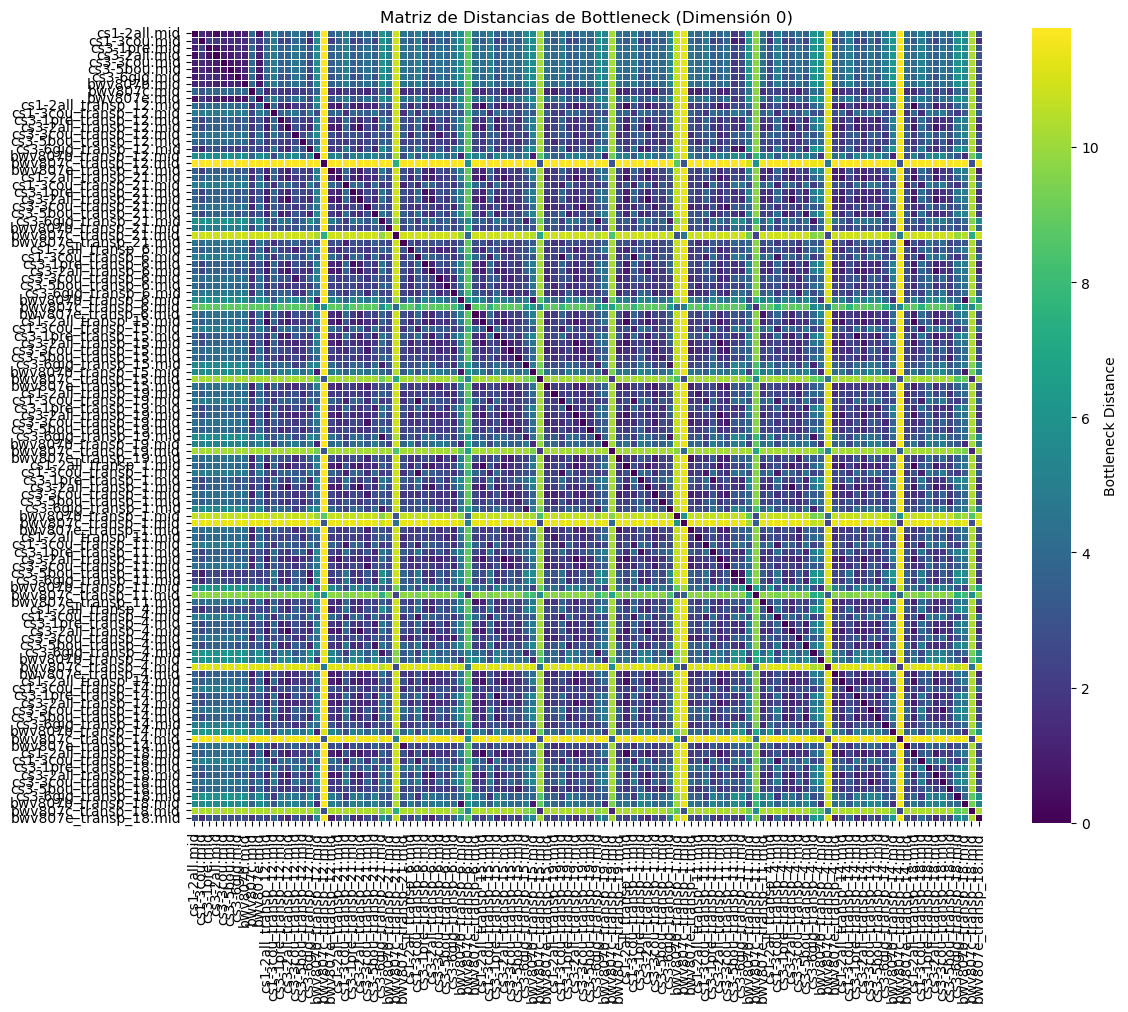

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear heatmap
sns.heatmap(distance_df, 
            cmap='viridis', 
            xticklabels=True, 
            yticklabels=True, 
            square=True,
            linewidths=0.5,
            cbar_kws={"label": "Bottleneck Distance"})

# Mejorar etiquetas
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Matriz de Distancias de Bottleneck (Dimensión 0)")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## CAMBIAR NOMBRE A LA DIMENSION CORRESPONDIENTE

In [21]:
distance_df.to_csv('distance_matrix1.csv')

## COMO VER ALGUNO DE LSO DIAGRAMAS

In [22]:
import pandas as pd
import numpy as np

# Supón que estos son los nombres de archivos
file_list = distance_df.index.tolist()

# Índices de ejemplos etiquetados (los primeros 6)
labeled_idx = file_list[:10]
unlabeled_idx = file_list[10:]

# Etiquetas conocidas para los primeros 6 elementos
labels = ["cs1-2all.mid", "cs1-3cou.mid", 'cs3-1pre.mid', 'cs3-2all.mid', 'cs3-3cou.mid', 'cs3-5bou.mid', 'cs3-6gig.mid','bwv807b.mid','bwv807c.mid','bwv807e.mid']  # Ajusta según tu caso

# DataFrame de etiquetas
label_series = pd.Series(labels, index=labeled_idx)

# Almacenar predicciones
predictions = {}

# Clasificación 1-NN para cada no etiquetado
for idx in unlabeled_idx:
    # Extraer las distancias del actual ejemplo a todos los etiquetados
    distances = distance_df.loc[idx, labeled_idx]
    
    # Encontrar el índice (archivo) con la menor distancia
    nearest_neighbor = distances.idxmin()
    
    # Asignar su clase
    predicted_label = label_series[nearest_neighbor]
    predictions[idx] = predicted_label

# Resultado
predictions_df = pd.Series(predictions, name='Predicted Label')
print(predictions_df)


cs1-2all_transp_12.mid     bwv807c.mid
cs1-3cou_transp_12.mid     bwv807c.mid
cs3-1pre_transp_12.mid     bwv807c.mid
cs3-2all_transp_12.mid     bwv807c.mid
cs3-3cou_transp_12.mid     bwv807c.mid
                              ...     
cs3-5bou_transp_18.mid     bwv807c.mid
cs3-6gig_transp_18.mid     bwv807c.mid
bwv807b_transp_18.mid      bwv807c.mid
bwv807c_transp_18.mid     cs1-2all.mid
bwv807e_transp_18.mid     cs1-3cou.mid
Name: Predicted Label, Length: 100, dtype: object


In [23]:
true_labels = {
    'cs1-2all_transp_12.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_12.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_12.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_12.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_12.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_12.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_12.mid': 'cs3-6gig.mid',
    'bwv807b_transp_12.mid': 'bwv807b.mid',
    'bwv807c_transp_12.mid': 'bwv807c.mid',
    'bwv807e_transp_12.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_21.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_21.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_21.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_21.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_21.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_21.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_21.mid': 'cs3-6gig.mid',
    'bwv807b_transp_21.mid': 'bwv807b.mid',
    'bwv807c_transp_21.mid': 'bwv807c.mid',
    'bwv807e_transp_21.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_6.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_6.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_6.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_6.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_6.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_6.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_6.mid': 'cs3-6gig.mid',
    'bwv807b_transp_6.mid': 'bwv807b.mid',
    'bwv807c_transp_6.mid': 'bwv807c.mid',
    'bwv807e_transp_6.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_15.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_15.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_15.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_15.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_15.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_15.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_15.mid': 'cs3-6gig.mid',
    'bwv807b_transp_15.mid': 'bwv807b.mid',
    'bwv807c_transp_15.mid': 'bwv807c.mid',
    'bwv807e_transp_15.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_19.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_19.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_19.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_19.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_19.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_19.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_19.mid': 'cs3-6gig.mid',
    'bwv807b_transp_19.mid': 'bwv807b.mid',
    'bwv807c_transp_19.mid': 'bwv807c.mid',
    'bwv807e_transp_19.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_1.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_1.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_1.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_1.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_1.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_1.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_1.mid': 'cs3-6gig.mid',
    'bwv807b_transp_1.mid': 'bwv807b.mid',
    'bwv807c_transp_1.mid': 'bwv807c.mid',
    'bwv807e_transp_1.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_11.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_11.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_11.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_11.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_11.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_11.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_11.mid': 'cs3-6gig.mid',
    'bwv807b_transp_11.mid': 'bwv807b.mid',
    'bwv807c_transp_11.mid': 'bwv807c.mid',
    'bwv807e_transp_11.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_4.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_4.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_4.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_4.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_4.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_4.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_4.mid': 'cs3-6gig.mid',
    'bwv807b_transp_4.mid': 'bwv807b.mid',
    'bwv807c_transp_4.mid': 'bwv807c.mid',
    'bwv807e_transp_4.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_14.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_14.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_14.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_14.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_14.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_14.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_14.mid': 'cs3-6gig.mid',
    'bwv807b_transp_14.mid': 'bwv807b.mid',
    'bwv807c_transp_14.mid': 'bwv807c.mid',
    'bwv807e_transp_14.mid': 'bwv807e.mid',
    
    'cs1-2all_transp_18.mid': 'cs1-2all.mid',
    'cs1-3cou_transp_18.mid': 'cs1-3cou.mid',
    'cs3-1pre_transp_18.mid': 'cs3-1pre.mid',
    'cs3-2all_transp_18.mid': 'cs3-2all.mid',
    'cs3-3cou_transp_18.mid': 'cs3-3cou.mid',
    'cs3-5bou_transp_18.mid': 'cs3-5bou.mid',
    'cs3-6gig_transp_18.mid': 'cs3-6gig.mid',
    'bwv807b_transp_18.mid': 'bwv807b.mid',
    'bwv807c_transp_18.mid': 'bwv807c.mid',
    'bwv807e_transp_18.mid': 'bwv807e.mid'
}


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Asegurar el mismo orden
unlabeled_files = list(predictions.keys())

y_true = [true_labels[file] for file in unlabeled_files]
y_pred = [predictions[file] for file in unlabeled_files]


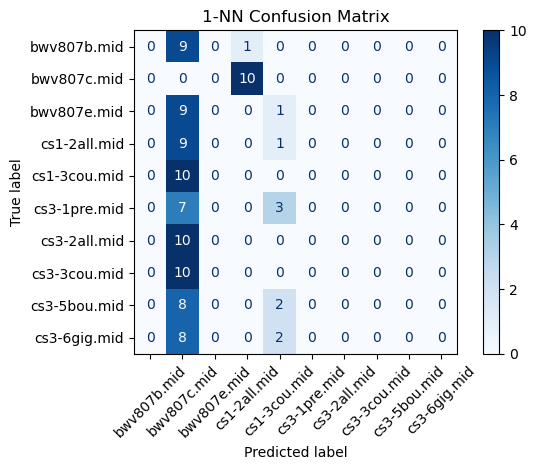

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = sorted(list(set(y_true + y_pred)))  # Todos los posibles labels

cm = confusion_matrix(y_true, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("1-NN Confusion Matrix")
plt.tight_layout()  # Asegura que todo encaje bien en la figura

plt.savefig("CM_dim1.png", dpi=300)  # Guarda la figura en alta resolución
# plt.savefig("CM_dim0.pdf")  # Alternativa si prefieres PDF



In [18]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

# y_true y y_pred deben estar definidos previamente

print(" Classification Report:")
print(classification_report(y_true, y_pred, digits=3))

print(f" Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
print(f" Precision: {precision_score(y_true, y_pred, average='macro'):.3f}")
print(f" Recall:    {recall_score(y_true, y_pred, average='macro'):.3f}")
print(f" F1-score:  {f1_score(y_true, y_pred, average='macro'):.3f}")


 Classification Report:
              precision    recall  f1-score   support

 bwv807b.mid      0.000     0.000     0.000      10.0
 bwv807c.mid      0.000     0.000     0.000      10.0
 bwv807e.mid      0.000     0.000     0.000      10.0
cs1-2all.mid      0.000     0.000     0.000      10.0
cs1-3cou.mid      0.000     0.000     0.000      10.0
cs3-1pre.mid      0.000     0.000     0.000      10.0
cs3-2all.mid      0.000     0.000     0.000      10.0
cs3-3cou.mid      0.000     0.000     0.000      10.0
cs3-5bou.mid      0.000     0.000     0.000      10.0
cs3-6gig.mid      0.000     0.000     0.000      10.0

    accuracy                          0.000     100.0
   macro avg      0.000     0.000     0.000     100.0
weighted avg      0.000     0.000     0.000     100.0

 Accuracy:  0.000
 Precision: 0.000
 Recall:    0.000
 F1-score:  0.000


/Users/juanjorodriguez/opt/anaconda3/envs/PRUEBAS/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanjorodriguez/opt/anaconda3/envs/PRUEBAS/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanjorodriguez/opt/anaconda3/envs/PRUEBAS/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

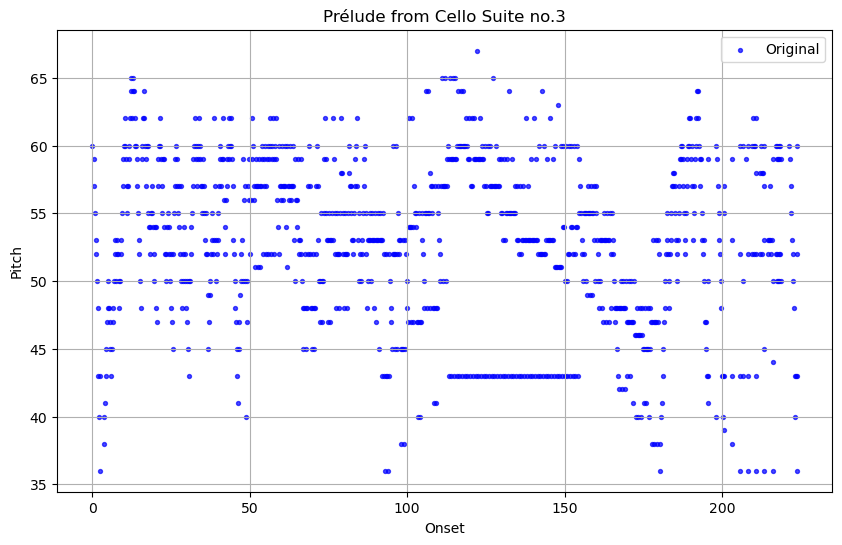

In [214]:
import matplotlib.pyplot as plt

# Tus datos
points1 = file_to_onset_pitch['cs3-1pre.mid']
#points2 = sampled_points_dict['cs3-1pre_transp_1.mid']

# Separar en listas x e y para cada conjunto de puntos
x1 = [p[0] for p in points1]
y1 = [p[1] for p in points1]

x2 = [p[0] for p in points2]
y2 = [p[1] for p in points2]

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, color='blue', alpha=0.7, label='Original',s=8)
#plt.scatter(x2, y2, color='red', alpha=0.7, label='Transposed +1 and $\sigma$=2')
plt.title("Prélude from Cello Suite no.3")
plt.xlabel("Onset")
plt.ylabel("Pitch")
plt.legend()
plt.grid(True)
plt.show()



In [191]:
points1= sampled_points_dict['cs3-1pre.mid']
points2 = [(onset, pitch - 1) for onset, pitch in sampled_points_dict['cs3-1pre_transp_1.mid']]


In [192]:
# Convertir listas a conjuntos de tuplas
set1 = set(points1)
set2 = set(points2)

# Comparar
if set1 == set2:
    print("✅ Los conjuntos tienen exactamente los mismos puntos (sin importar el orden).")
else:
    print("❌ Los conjuntos tienen diferencias.")

    # Puntos que están en points1 pero no en points2
    only_in_1 = set1 - set2
    print(f"Puntos solo en points1: {only_in_1}")

    # Puntos que están en points2 pero no en points1
    only_in_2 = set2 - set1
    print(f"Puntos solo en points2: {only_in_2}")


❌ Los conjuntos tienen diferencias.
Puntos solo en points1: {(50.19157088122605, 22.349932418050855), (56.8007662835249, 25.478922956577975), (80.17241379310344, 16.98594863771865), (43.10344827586207, 26.819918901661026), (66.0919540229885, 28.160914846744078), (81.32183908045978, 22.349932418050855), (39.655172413793096, 23.690928363133906), (96.16858237547892, 25.478922956577975), (11.7816091954023, 26.37292025330001), (93.10344827586206, 23.24392971477289), (89.6551724137931, 25.478922956577975), (33.524904214559385, 23.690928363133906), (22.60536398467433, 26.37292025330001), (29.501915708812263, 23.690928363133906), (63.2183908045977, 19.220941879523735), (0.5747126436781609, 23.24392971477289), (13.314176245210728, 21.45593512132882), (44.73180076628352, 21.45593512132882), (40.13409961685824, 24.58492565985594), (95.30651340996168, 26.819918901661026), (42.04980842911878, 19.220941879523735), (64.272030651341, 23.24392971477289), (56.13026819923371, 26.819918901661026), (86.781

In [178]:
import numpy as np

def almost_equal(p1, p2, tol=1e-5):
    return np.allclose(p1, p2, atol=tol)

diff1 = [p for p in points1 if not any(almost_equal(p, q) for q in points2)]
diff2 = [q for q in points2 if not any(almost_equal(q, p) for p in points1)]

if not diff1 and not diff2:
    print("✅ Los conjuntos son iguales (dentro de la tolerancia).")
else:
    print("❌ Hay diferencias (con tolerancia):")
    print(f"Puntos únicos en points1: {diff1}")
    print(f"Puntos únicos en points2: {diff2}")


❌ Hay diferencias (con tolerancia):
Puntos únicos en points1: [array([25.        , 23.24392971]), array([100.        ,  16.09195134]), array([63.79310345, 28.6079135 ]), array([ 0.       , 26.8199189]), array([46.16858238, 17.87994593]), array([80.17241379, 16.98594864]), array([90.8045977 , 26.37292025]), array([11.49425287, 20.11493918]), array([37.54789272, 27.7139162 ]), array([51.53256705, 29.05491214]), array([57.47126437, 19.22094188]), array([ 1.14942529, 16.09195134]), array([68.96551724, 19.22094188]), array([90.8045977 , 16.98594864]), array([100.       ,  26.8199189]), array([17.33716475, 27.7139162 ]), array([82.27969349, 25.47892296]), array([32.66283525, 21.00893647]), array([ 9.57854406, 27.7139162 ]), array([73.75478927, 24.58492566]), array([45.68965517, 25.47892296]), array([39.94252874, 21.45593512]), array([20.68965517, 18.32694458]), array([57.66283525, 26.37292025]), array([30.74712644, 26.8199189 ]), array([ 3.83141762, 21.45593512]), array([63.2183908 , 19.2209